<a href="https://colab.research.google.com/github/kartikjoshi267/ml-lab-project/blob/main/Student_Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the dependencies

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [42]:
data = pd.read_csv("https://gist.githubusercontent.com/kartikjoshi267/ba4ae15f188cc5c854fb335cbfdb5596/raw/97b0df68b1d98a4b21ba13d2f66845bd9b2e6dbc/placement_data.csv")
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


## Removing StudentID attribute as it is not needed

In [43]:
data.drop(columns='StudentID', inplace=True)
# x.head()

## Getting an idea of the numerical columns like measures of central tendency, min, max, etc.

In [44]:
data.describe().round(2)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,7.70,1.05,2.03,1.01,79.45,4.32,69.16,74.50
std,0.64,0.67,0.87,0.90,8.16,0.41,10.43,8.92
min,6.50,0.00,0.00,0.00,60.00,3.00,55.00,57.00
25%,7.40,1.00,1.00,0.00,73.00,4.00,59.00,67.00
50%,7.70,1.00,2.00,1.00,80.00,4.40,70.00,73.00
75%,8.20,1.00,3.00,2.00,87.00,4.70,78.00,83.00
max,9.10,2.00,3.00,3.00,90.00,4.80,90.00,88.00


## Checking for tuples containing NULL values

In [45]:
data.isnull().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

## Segregating numerical and categorical columns

In [46]:
numerical_cols = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_cols = [feature for feature in data.columns if data[feature].dtype == 'O']

categorical_classes = {}

In [47]:
numerical_cols

['CGPA',
 'Internships',
 'Projects',
 'Workshops/Certifications',
 'AptitudeTestScore',
 'SoftSkillsRating',
 'SSC_Marks',
 'HSC_Marks']

In [48]:
categorical_cols

['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

## Data Visualization

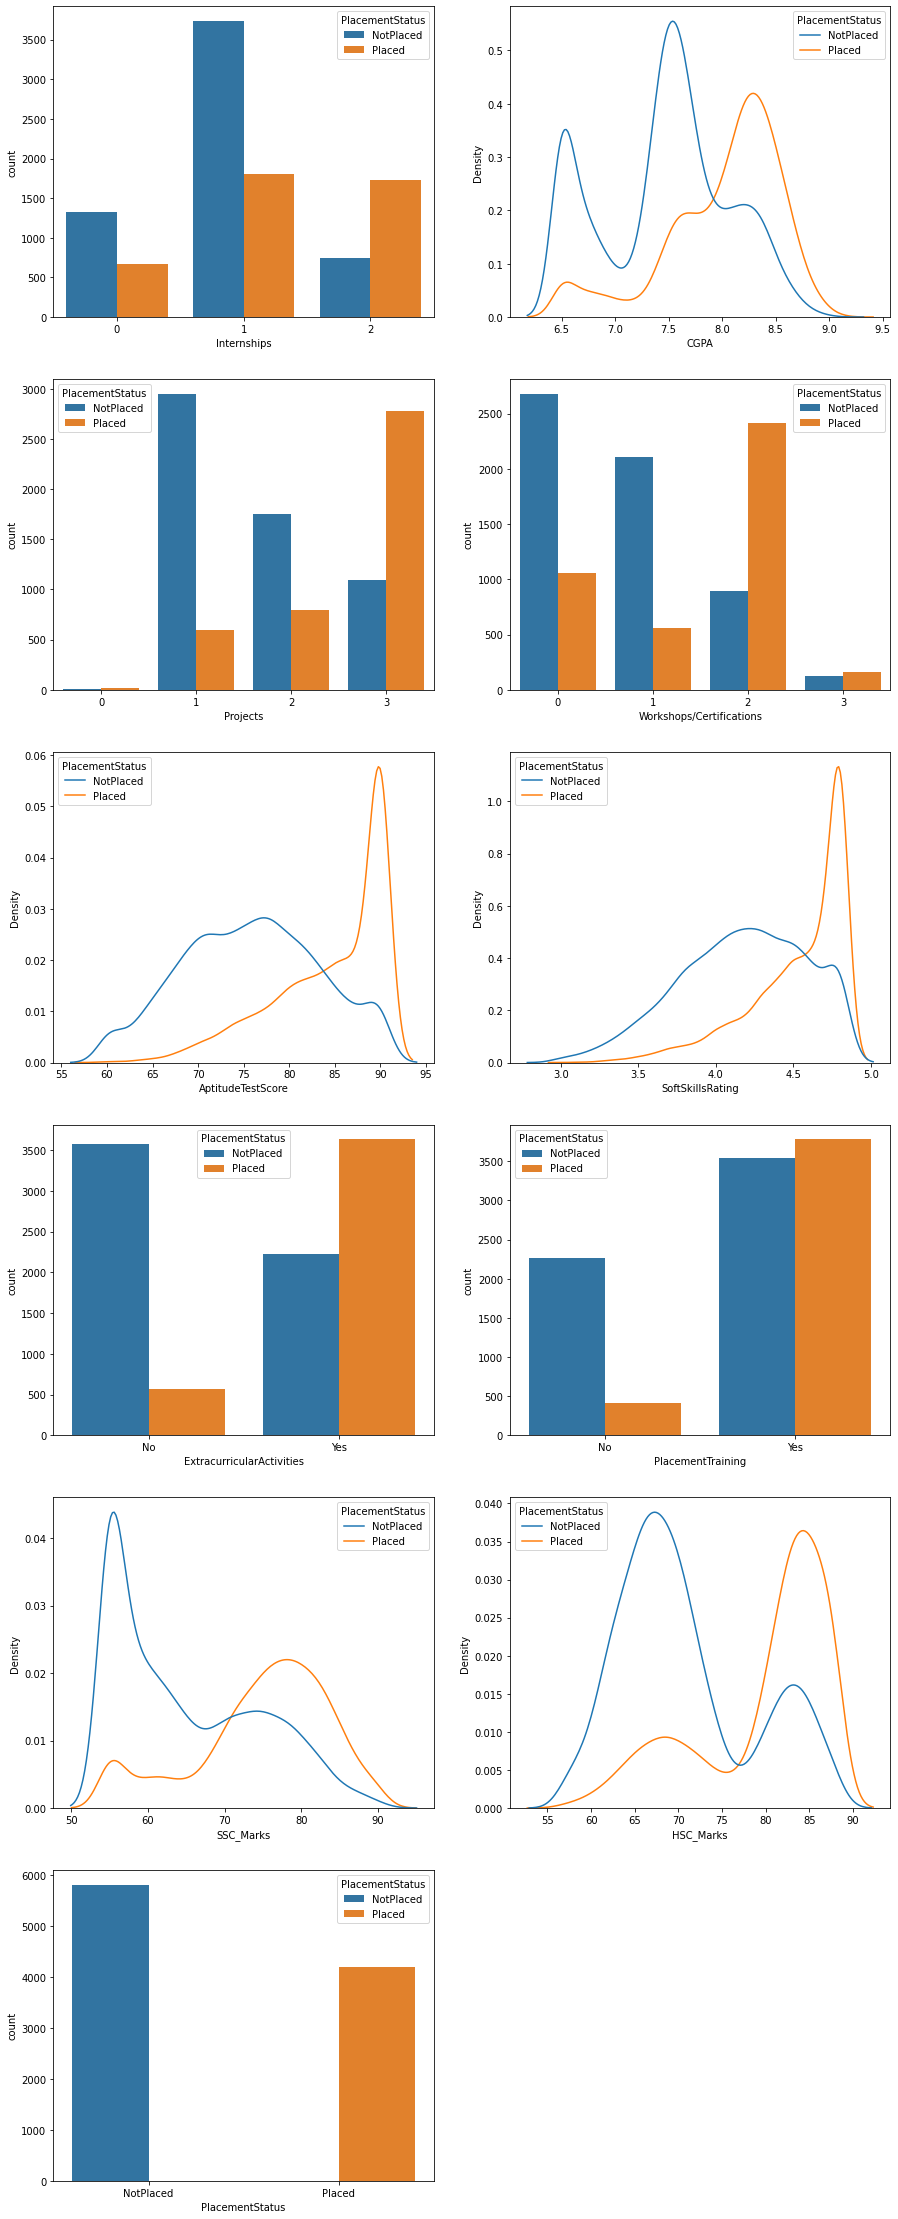

In [49]:
fig, ax = plt.subplots(6, 2)
fig.set_figheight(40)
fig.set_figwidth(15)

# KDE - Kernel Density Estimate

sns.countplot(x=data['Internships'], ax=ax[0,0], hue=data['PlacementStatus'])
sns.kdeplot(x=data['CGPA'], ax=ax[0,1], hue=data['PlacementStatus'])
sns.countplot(x=data['Projects'], ax=ax[1,0], hue=data['PlacementStatus'])
sns.countplot(x=data['Workshops/Certifications'], ax=ax[1,1], hue=data['PlacementStatus'])
sns.kdeplot(x=data['AptitudeTestScore'], ax=ax[2,0], hue=data['PlacementStatus'])
sns.kdeplot(x=data['SoftSkillsRating'], ax=ax[2,1], hue=data['PlacementStatus'])
sns.countplot(x=data['ExtracurricularActivities'], ax=ax[3,0], hue=data['PlacementStatus'])
sns.countplot(x=data['PlacementTraining'], ax=ax[3,1], hue=data['PlacementStatus'])
sns.kdeplot(x=data['SSC_Marks'], ax=ax[4,0], hue=data['PlacementStatus'])
sns.kdeplot(x=data['HSC_Marks'], ax=ax[4,1], hue=data['PlacementStatus'])
sns.countplot(x=data['PlacementStatus'], ax=ax[5,0], hue=data['PlacementStatus'])
ax[5,1].set_axis_off()
plt.show()

### Inferences from the above visualization
1. Students with 1 internship are more likely to get placed
2. Maximum number of students have CGPA in between 7.5 and 8
3. Students with atleast 3 projects have more chances of getting placed
4. Students with atleast 2 certifications/workshop experiences are more likely to get placed
5. Extracurricular activities and placement training also increase chances of placement
6. Students with CGPA between 8 to 9 are more likely to get placed
7. Students with good aptitude test score and having strong soft skills are more likely to get placed
8. Students with HSC and SSC marks above 70-75% have more chances of getting placed

## Encoding categorical data using Label Encoder

In [50]:
from sklearn.preprocessing import LabelEncoder
dataForCorr = data

In [51]:
le = LabelEncoder()
for i in categorical_cols:
  dataForCorr[i] = le.fit_transform(dataForCorr[i])
  categorical_classes[i] = le.classes_

dataForCorr.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1


In [52]:
categorical_classes

{'ExtracurricularActivities': array(['No', 'Yes'], dtype=object),
 'PlacementTraining': array(['No', 'Yes'], dtype=object),
 'PlacementStatus': array(['NotPlaced', 'Placed'], dtype=object)}

For ExtracurricularActivities:
- 0 - No
- 1 - Yes

For PlacementTraining:
- 0 - No
- 1 - Yes

For PlacementStatus:
- 0 - NotPlaced
- 1 - Placed

## Checking Correlation between the various attributes

In [53]:
correlation_matrix = dataForCorr.corr()
correlation_matrix

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
CGPA,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.444130,0.251628,0.404971,0.462313,0.423131
Internships,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.274960,0.153547,0.279837,0.317149,0.260340
Projects,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.491430,0.293709,0.499421,0.535708,0.475186
Workshops/Certifications,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373926,0.180333,0.373045,0.418442,0.362268
AptitudeTestScore,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.474130,0.314772,0.513044,0.565105,0.521744
SoftSkillsRating,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.448049,0.235571,0.430734,0.466912,0.427284
ExtracurricularActivities,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,1.000000,0.327158,0.517850,0.533572,0.482491
PlacementTraining,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.327158,1.000000,0.257440,0.325434,0.323659
SSC_Marks,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,0.517850,0.257440,1.000000,0.524916,0.469763
HSC_Marks,0.462313,0.317149,0.535708,0.418442,0.565105,0.466912,0.533572,0.325434,0.524916,1.000000,0.505746


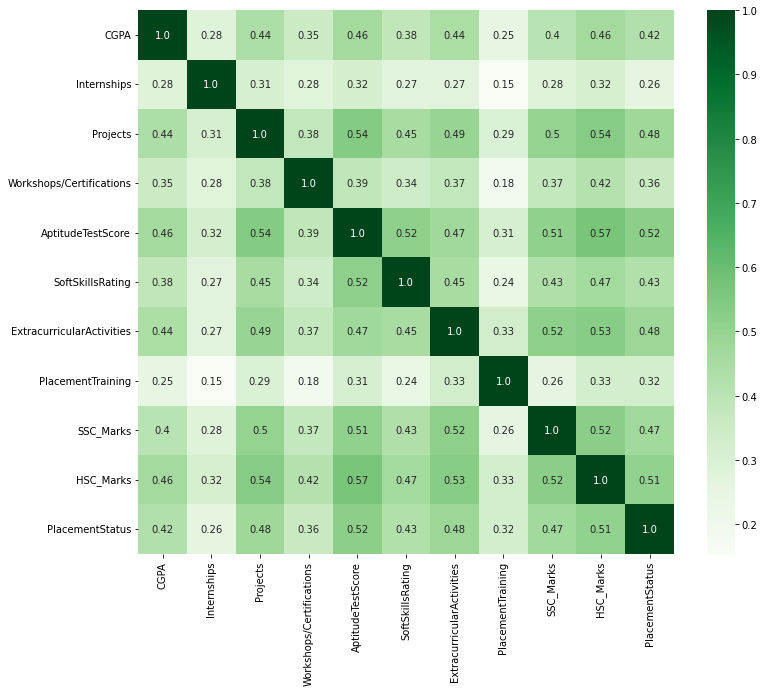

In [54]:
# Visualization of above correlation matrix using heatmap
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)
sns.heatmap(correlation_matrix, annot=True, fmt=".2", cmap='Greens')
plt.show()

In [55]:
x=data.drop(labels=['PlacementStatus'], axis=1)
xForCorr = dataForCorr.drop(labels=['PlacementStatus'], axis=1)
x

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66
9996,7.4,0,1,0,90,4.8,0,0,84,67
9997,8.4,1,3,0,70,4.8,1,1,79,81
9998,8.9,0,3,2,87,4.8,1,1,71,85


In [56]:
y=data.PlacementStatus
yForCorr=dataForCorr.PlacementStatus
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int32

In [57]:
categorical_cols.remove('PlacementStatus')
categorical_cols

['ExtracurricularActivities', 'PlacementTraining']

<AxesSubplot: >

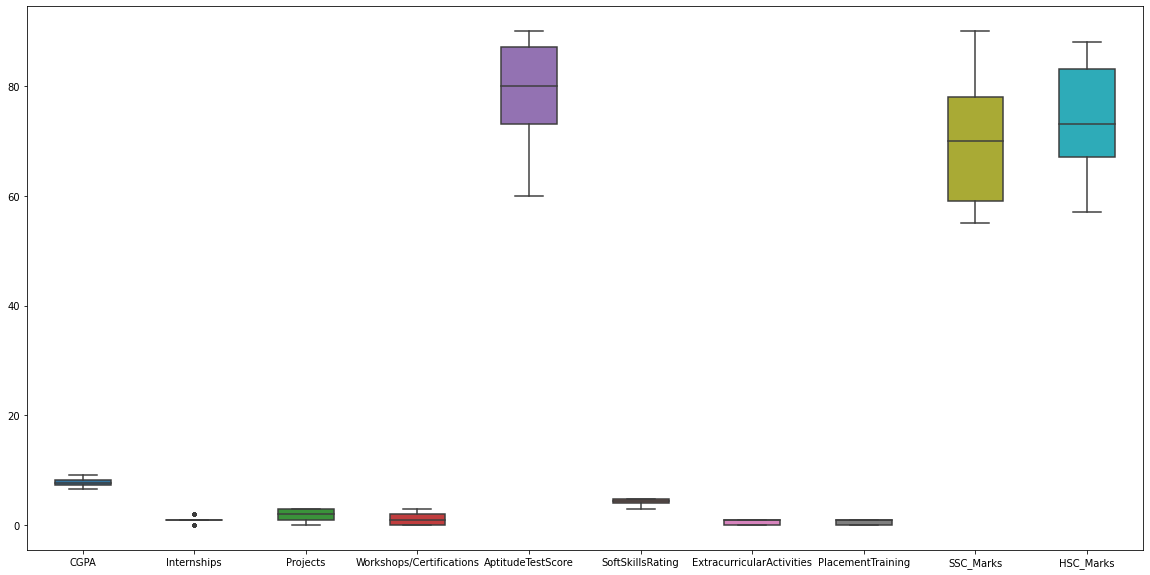

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=xForCorr, width= 0.5,ax=ax,  fliersize=3)

Here we can see that the ranges of data are very different therefore the attribute with higher range can dominate the behavior of the analytics more than the attribute with a lower range

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [60]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)
cat_pipeline=Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehotencoder', OneHotEncoder())
    ]
)

In [61]:
preprocessor=ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)
])

## Splitting the data into training and testing datasets

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.1, random_state=42)

## Transforming the parameters by:
- Scaling the numerical columns with the help of StandardScaler i.e. $x_{new} = \frac{x_{old} - \mu}{\sigma}$ where $\sigma$ and $\mu$ are standard deviations and mean respectively.

- Encoding the categorical columns with the help of OneHot Encoder.

In [63]:
x_train=preprocessor.fit_transform(x_train)
x_train
x_test=preprocessor.transform(x_test)
preprocessor.get_feature_names_out()

array(['num_pipeline__CGPA', 'num_pipeline__Internships',
       'num_pipeline__Projects', 'num_pipeline__Workshops/Certifications',
       'num_pipeline__AptitudeTestScore',
       'num_pipeline__SoftSkillsRating', 'num_pipeline__SSC_Marks',
       'num_pipeline__HSC_Marks',
       'cat_pipeline__ExtracurricularActivities_0',
       'cat_pipeline__ExtracurricularActivities_1',
       'cat_pipeline__PlacementTraining_0',
       'cat_pipeline__PlacementTraining_1'], dtype=object)

<AxesSubplot: >

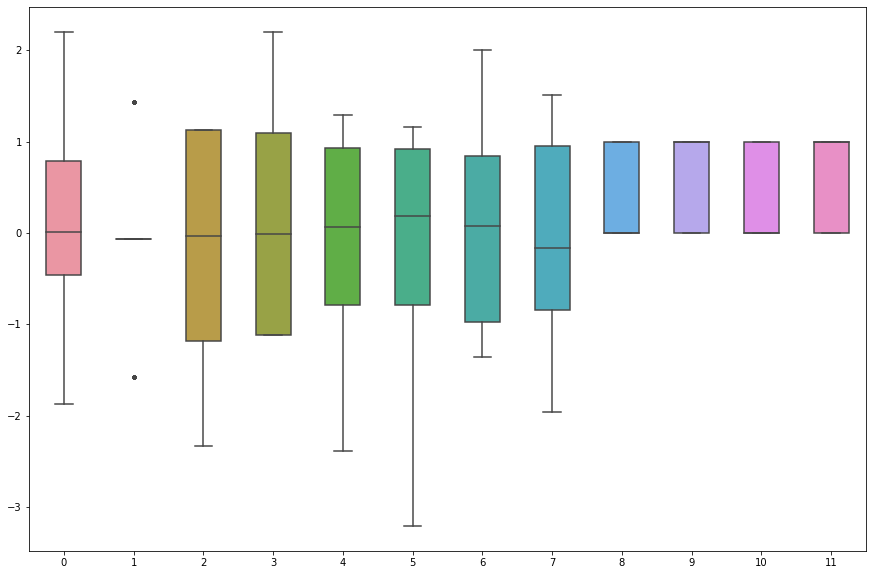

In [64]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=x_train , width= 0.5,ax=ax,  fliersize=3)

Here we can see all the columns are in the range of (-4,3) approximately

In [65]:
%pip install logitboost
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from logitboost import LogitBoost
import xgboost as xgb

models={
    'logistic_regression':LogisticRegression(),
    'support_vector':SVC(),
    'random_forest':RandomForestClassifier(),
    'naive_bayes': GaussianNB(),
    'decision_tree':DecisionTreeClassifier(),
    'KNN':KNeighborsClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'Logitboost': LogitBoost(),
    'Xgboost': xgb.XGBClassifier()
}

In [67]:
from sklearn.metrics import accuracy_score
def evaluate_model(x_train, y_train, x_test, y_test, models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(x_train, y_train)
        y_pred=model.predict(x_test)
        test_model_score=accuracy_score(y_test, y_pred)
        report[list(models.keys())[i]]=test_model_score*100
    return sorted(report.items(), key=lambda kv: (kv[1], kv[0]))

In [68]:
evaluate_model(x_train, y_train, x_test, y_test, models)

[('decision_tree', 72.89999999999999),
 ('KNN', 77.4),
 ('naive_bayes', 79.0),
 ('random_forest', 79.5),
 ('Xgboost', 79.60000000000001),
 ('support_vector', 79.80000000000001),
 ('Adaboost', 80.2),
 ('logistic_regression', 80.2),
 ('Logitboost', 80.80000000000001)]

In [69]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_test).value_counts())
print(pd.DataFrame(y_train).value_counts())

PlacementStatus
0                  5803
1                  4197
dtype: int64
PlacementStatus
0                  585
1                  415
dtype: int64
PlacementStatus
0                  5218
1                  3782
dtype: int64


In [70]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

print(AdaBoostClassifier().get_params())

model = RandomizedSearchCV(AdaBoostClassifier(), param_distributions={
  # 'base_estimator': [None, LinearRegression(), LinearSVR()],
  'n_estimators': [i for i in range(1, 61)],
  'random_state': [None, 42],
  # 'objective': ['binary:rawlogit', 'binary:logistic']
}, cv=5)

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


In [71]:
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'random_state': [None, 42]})

In [72]:
model.best_params_

{'random_state': 42, 'n_estimators': 47}

In [73]:
model.score(x_train, y_train)

0.8031111111111111

In [74]:
model.score(x_test, y_test)

0.801

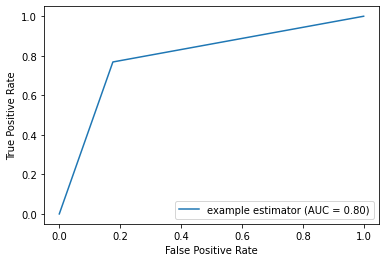

In [75]:
from sklearn.metrics import accuracy_score, roc_curve, recall_score, precision_score, RocCurveDisplay, auc, f1_score
pred = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()
# roc_curve(y_true=y_test, y_score=model.predict(x_test))

In [76]:
recall_score(y_test, pred)

0.7686746987951807

In [77]:
precision_score(y_test, pred)

0.7559241706161137

In [78]:
accuracy_score(y_test, pred)

0.801

In [79]:
f1_score(y_test, pred)

0.7622461170848267

In [80]:
import pickle

with open('./webapp/static/datasets/model.pkl', 'wb+') as f:
  pickle.dump(model, f)